#### Bejaia Region ,Sidi-Bel Abbes Region are the two regions mentioned in the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',skiprows=1)

In [2]:
data.shape

(246, 14)

#### Dropping two rows of the second table(Includes header and Heading)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.drop(index=[122,123],inplace=True)

In [5]:
data.shape

(244, 14)

#### Creation of column mentioning the region

In [6]:
data['Region']=['Bejaia Region' if i<122 else 'Sidi-Bel Abbes Region' for i in range(0,244) ]

In [7]:
#Merging the day and the month column and the year column
data['Date']=data['day']+'-'+data['month']+'-'+data['year']

In [8]:
data.drop(columns=['day','month','year'],inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  244 non-null    object
 1    RH          244 non-null    object
 2    Ws          244 non-null    object
 3   Rain         244 non-null    object
 4   FFMC         244 non-null    object
 5   DMC          244 non-null    object
 6   DC           244 non-null    object
 7   ISI          244 non-null    object
 8   BUI          244 non-null    object
 9   FWI          244 non-null    object
 10  Classes      243 non-null    object
 11  Region       244 non-null    object
 12  Date         244 non-null    object
dtypes: object(13)
memory usage: 26.7+ KB


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(244, 13)

In [12]:
data.columns # Extra space in the columns of RH and Ws in the prefix and Classes,Rain at the suffix needs to be trimmed

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'Region', 'Date'],
      dtype='object')

In [13]:
data.rename(columns={' RH':'RH',' Ws':'Ws','Rain ':'Rain','Classes  ':'Classes'},inplace=True)

### No.of Unique()

In [14]:
data.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            127
Classes          8
Region           2
Date           122
dtype: int64

In [15]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [16]:
data['Classes']=data['Classes'].str.rstrip()

In [17]:
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

Date-->Datetime</br>
Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI------>Numeric</br>
Classes,Region-------->Object

In [19]:
data['Date']=pd.to_datetime(data['Date'])
data['Temperature']=pd.to_numeric(data['Temperature'])
data['RH']=pd.to_numeric(data['RH'])
data['Ws']=pd.to_numeric(data['Ws'])
data['Rain']=pd.to_numeric(data['Rain'])
data['FFMC']=pd.to_numeric(data['FFMC'])
data['DMC']=pd.to_numeric(data['DMC'])
data['DC']=pd.to_numeric(data['DC'])
data['ISI']=pd.to_numeric(data['ISI'])
data['BUI']=pd.to_numeric(data['BUI'])
data['FWI']=pd.to_numeric(data['FWI'])

ValueError: Unable to parse string "14.6 9" at position 165

In [20]:
data['DC']=data['DC'].str.replace('14.6 9','14.69')

In [21]:
data['Date']=pd.to_datetime(data['Date'])
data['Temperature']=pd.to_numeric(data['Temperature'])
data['RH']=pd.to_numeric(data['RH'])
data['Ws']=pd.to_numeric(data['Ws'])
data['Rain']=pd.to_numeric(data['Rain'])
data['FFMC']=pd.to_numeric(data['FFMC'])
data['DMC']=pd.to_numeric(data['DMC'])
data['DC']=pd.to_numeric(data['DC'])
data['ISI']=pd.to_numeric(data['ISI'])
data['BUI']=pd.to_numeric(data['BUI'])
data['FWI']=pd.to_numeric(data['FWI'])

ValueError: Unable to parse string "fire   " at position 165

In [22]:
data['Classes'][167]='fire'
data['FWI'][167]=np.nan

In [23]:
data['Date']=pd.to_datetime(data['Date'])
data['Temperature']=pd.to_numeric(data['Temperature'])
data['RH']=pd.to_numeric(data['RH'])
data['Ws']=pd.to_numeric(data['Ws'])
data['Rain']=pd.to_numeric(data['Rain'])
data['FFMC']=pd.to_numeric(data['FFMC'])
data['DMC']=pd.to_numeric(data['DMC'])
data['DC']=pd.to_numeric(data['DC'])
data['ISI']=pd.to_numeric(data['ISI'])
data['BUI']=pd.to_numeric(data['BUI'])
data['FWI']=pd.to_numeric(data['FWI'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int64         
 1   RH           244 non-null    int64         
 2   Ws           244 non-null    int64         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          243 non-null    float64       
 10  Classes      244 non-null    object        
 11  Region       244 non-null    object        
 12  Date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 34.8+ KB


In [25]:
num_col=[feat for feat in data.columns if data[feat].dtypes!='O' and data[feat].dtypes!='<M8[ns]']
cat_col=[feat for feat in data.columns if data[feat].dtypes=='O']
date_col=[feat for feat in data.columns if data[feat].dtypes=='<M8[ns]']

### Class Imbalance check

In [26]:
data['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

### Missing Value Analysis

In [27]:
data.isnull().mean()

Temperature    0.000000
RH             0.000000
Ws             0.000000
Rain           0.000000
FFMC           0.000000
DMC            0.000000
DC             0.000000
ISI            0.000000
BUI            0.000000
FWI            0.004098
Classes        0.000000
Region         0.000000
Date           0.000000
dtype: float64

<AxesSubplot:title={'center':'Before imputation'}, ylabel='Density'>

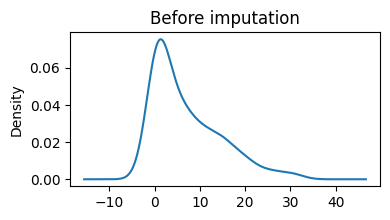

In [28]:
data['FWI'].plot(kind='kde',figsize=(4,2),title='Before imputation')

#### All the columns except the FWI column has no missing values. The percentage of missing value is 4%.

In [29]:
data.dropna(how='any',axis=0,inplace=True)

<AxesSubplot:title={'center':'After imputation'}, ylabel='Density'>

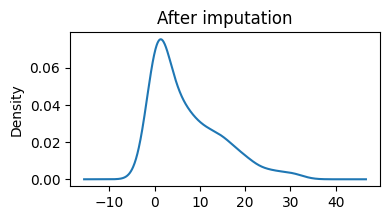

In [30]:
data['FWI'].plot(kind='kde',figsize=(4,2),title='After imputation')

In [31]:
data.isnull().mean()

Temperature    0.0
RH             0.0
Ws             0.0
Rain           0.0
FFMC           0.0
DMC            0.0
DC             0.0
ISI            0.0
BUI            0.0
FWI            0.0
Classes        0.0
Region         0.0
Date           0.0
dtype: float64

### Outlier Analysis

In [32]:
from scipy import stats

def plot_graph(df,var):
  plt.subplot(1,3,1)
  df[var].plot(kind='kde')
  plt.xlabel(var)
  plt.subplot(1,3,2)
  stats.probplot(df[var],dist='norm',plot=plt)
  plt.xlabel(var)
  plt.subplot(1,3,3)
  df[var].plot(kind='box')
  plt.xlabel(var)
  plt.show()

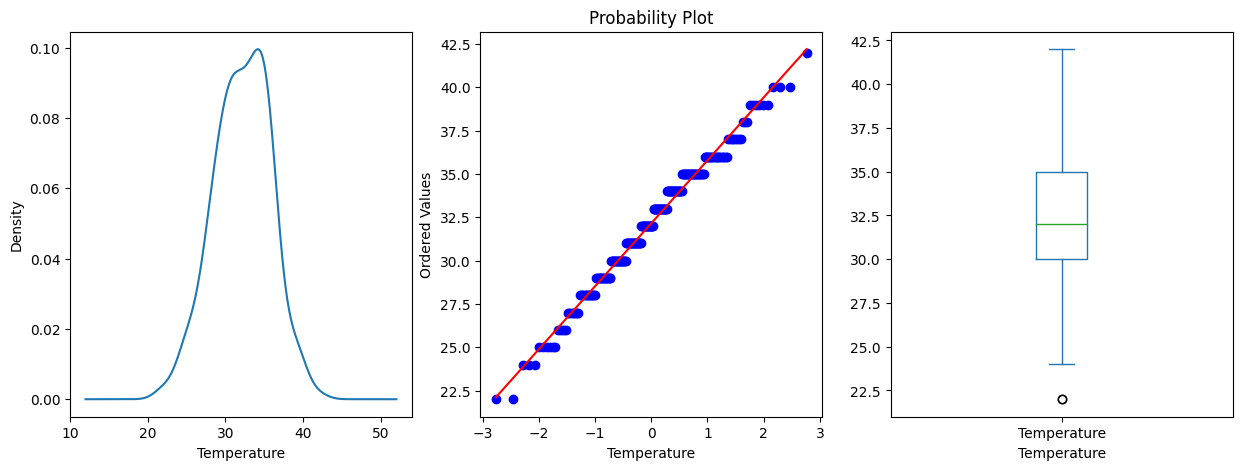

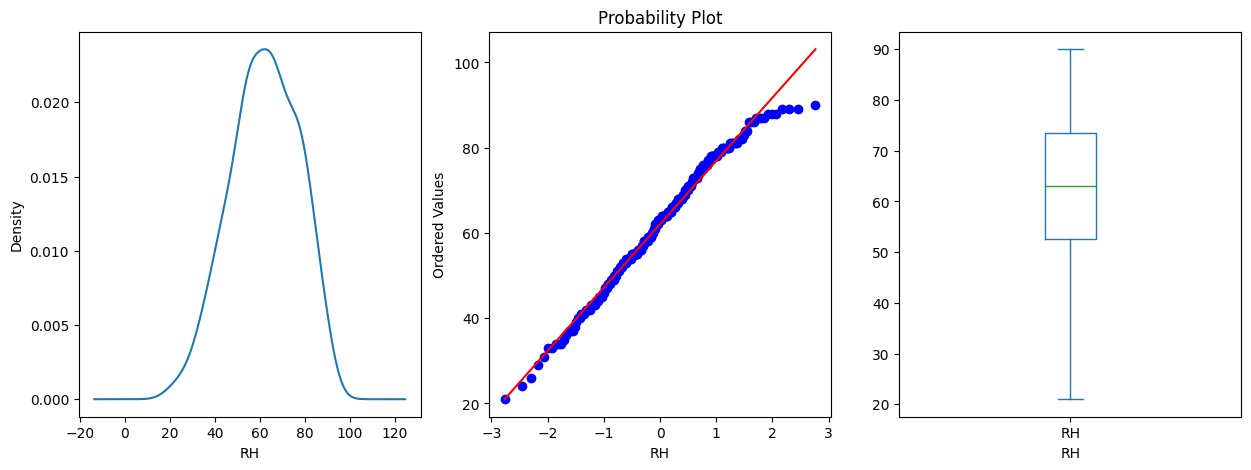

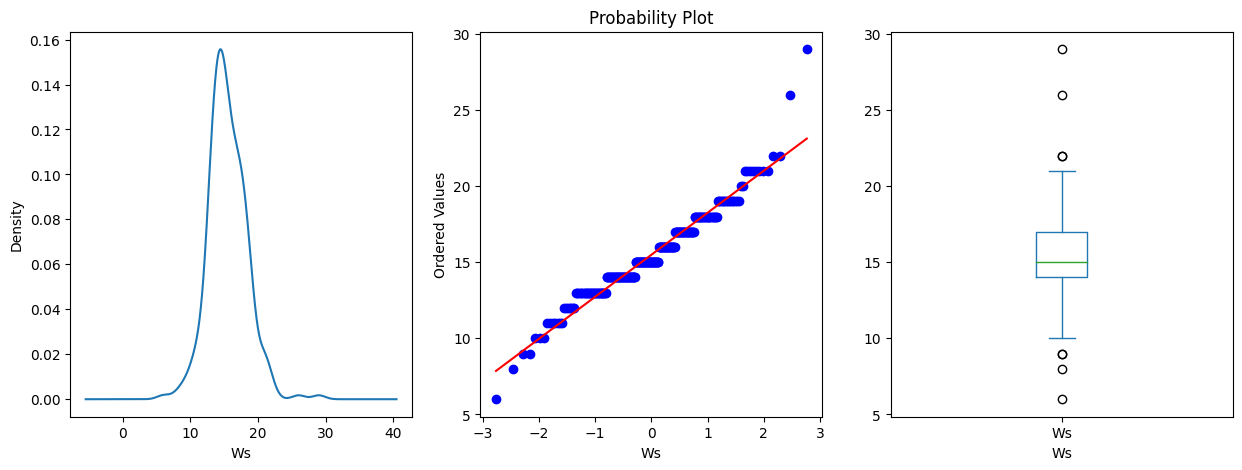

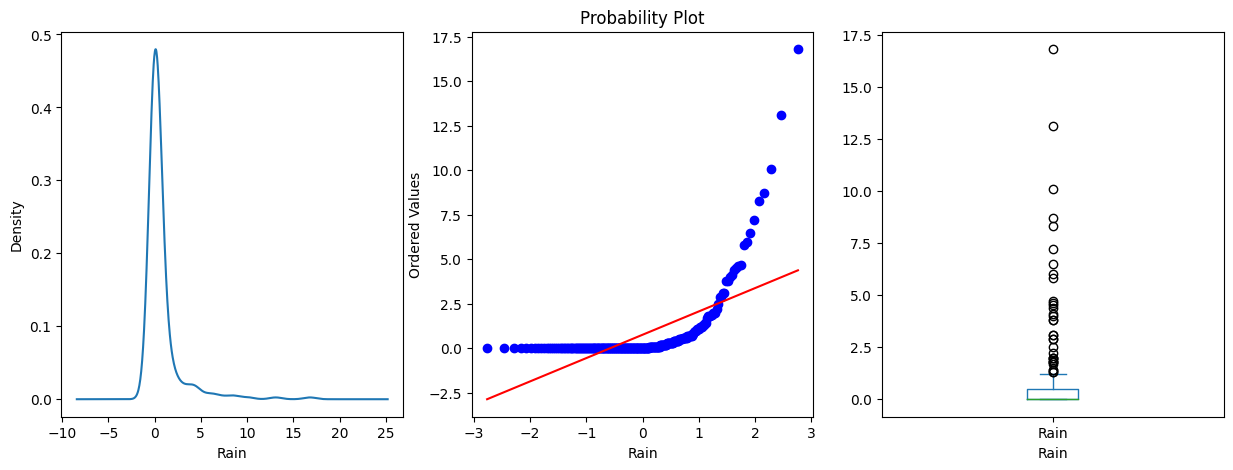

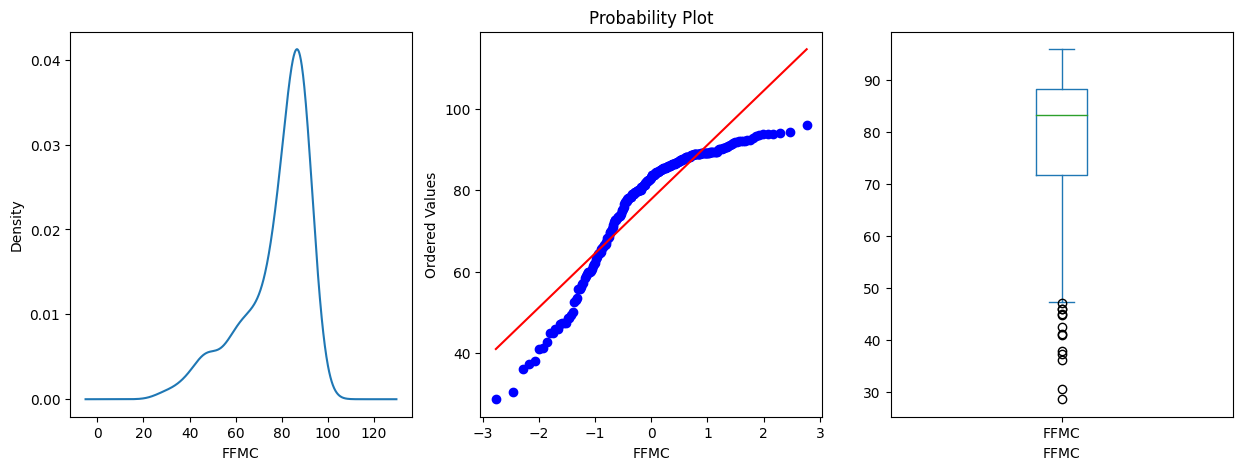

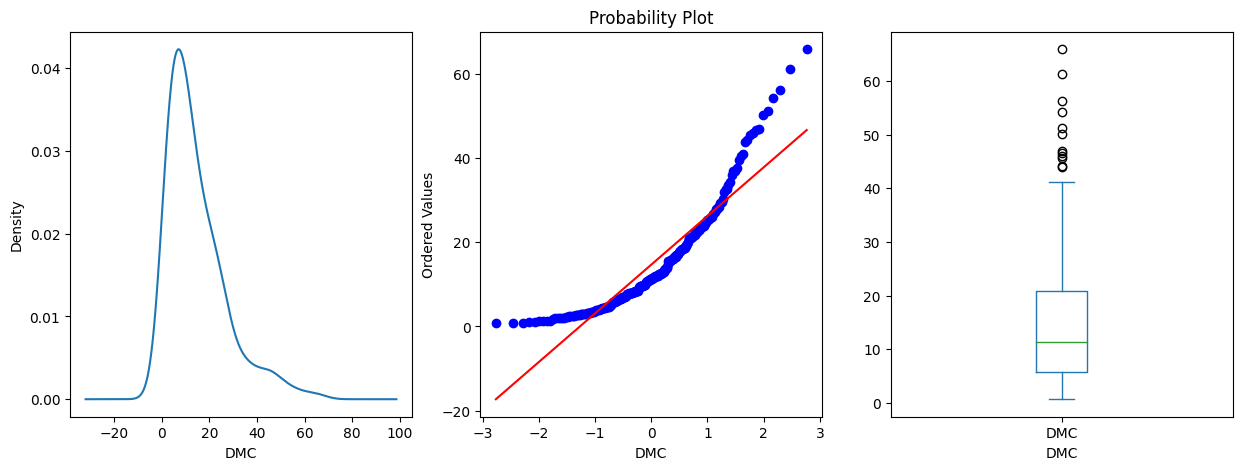

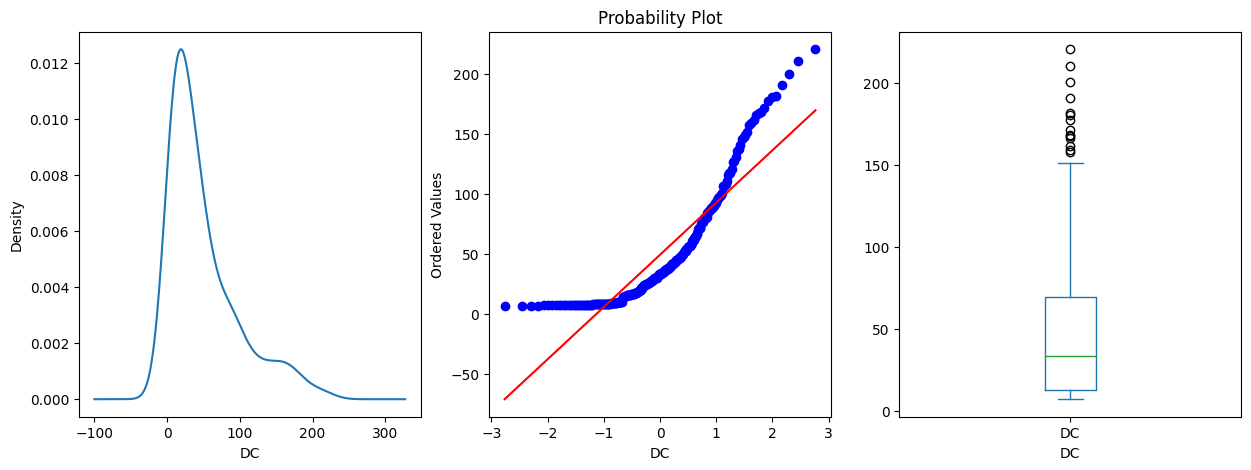

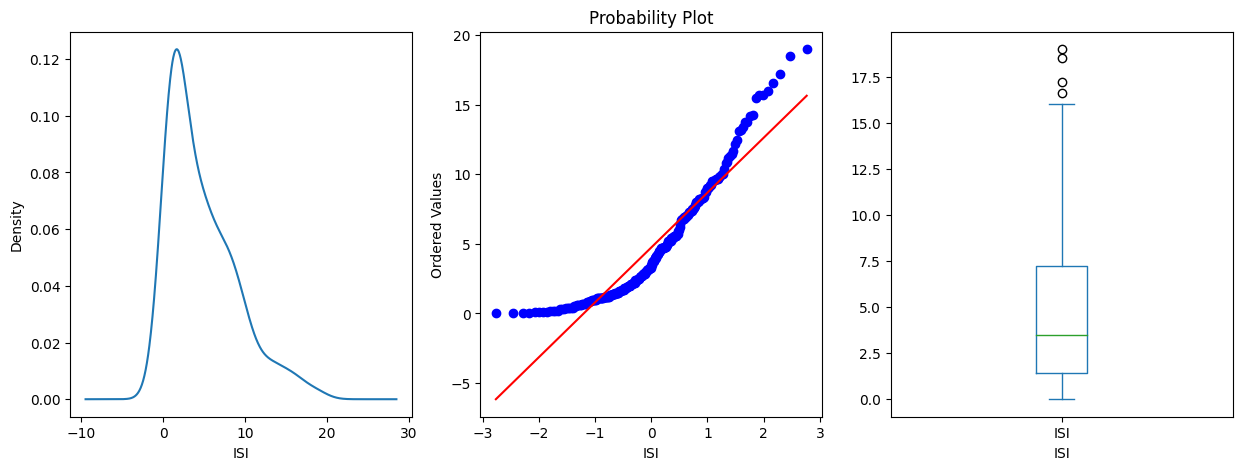

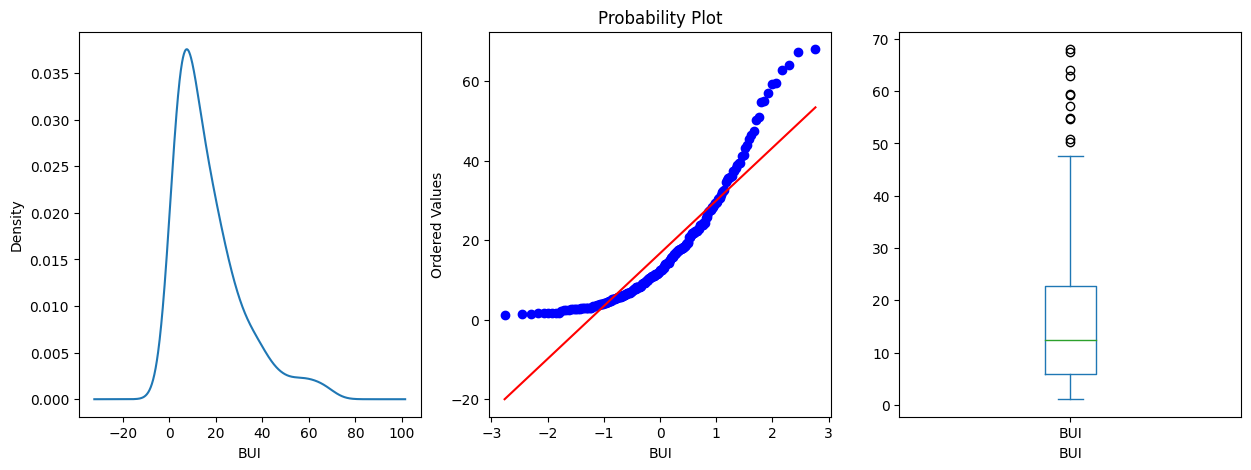

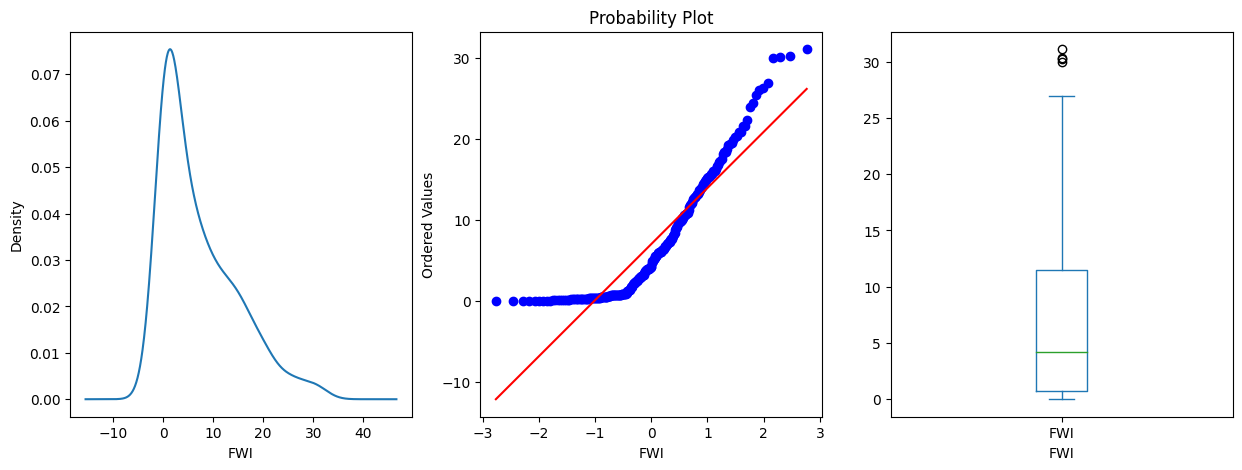

In [33]:
for var in num_col:
  plt.figure(figsize=(15,5))
  plot_graph(data,var)

#### Some conclussion can be drawn from the above plot:-

1.Temperature,RH,Ws follows normal distribution curve.Rain,DMC,DC,ISI,BUI,FWI follows log-normal distribution.FFMC is left skewd.</br>
2.RH has no outliers.Ws has outliers on both the tails. Rain,DMC,DC,ISI,BUI,FWI has outliers on right tail.Temperature,FFMC has outliers on the left tail.

In [34]:
# Replacing the outlier with quartiles

def outlier_threshold(df,var):
    
    q2=df[var].quantile(0.75)
    q1=df[var].quantile(0.25)
    iqr=q2-q1
    upper=q2+1.5*iqr
    lower=q1-1.5*iqr
    return upper,lower


def replace_outlier(df,var):
    "var has to be numeric"
    
    for i in var:
        upper_bound,lower_bound=outlier_threshold(df,i)
        df[i]=np.where(df[i]>upper_bound,upper_bound,
                                np.where(df[i]<lower_bound,lower_bound,df[i]))
    print('Outliers has been replaced')
        

In [35]:
replace_outlier(data,num_col)

Outliers has been replaced


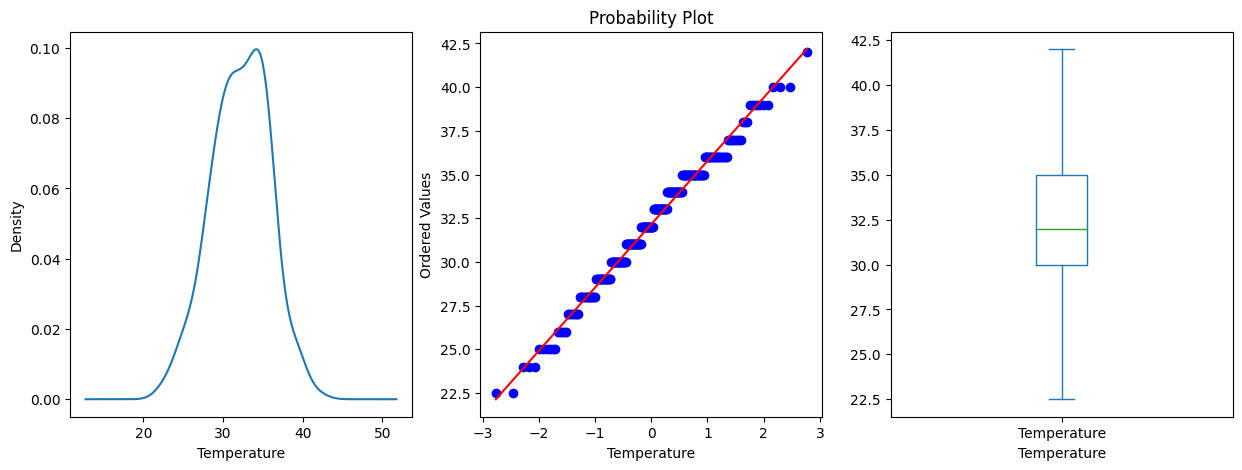

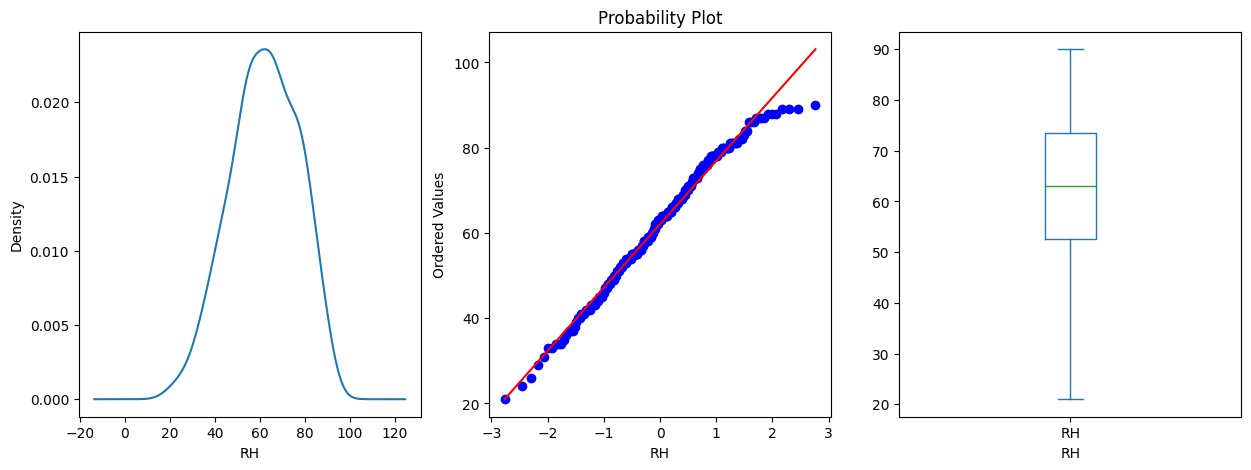

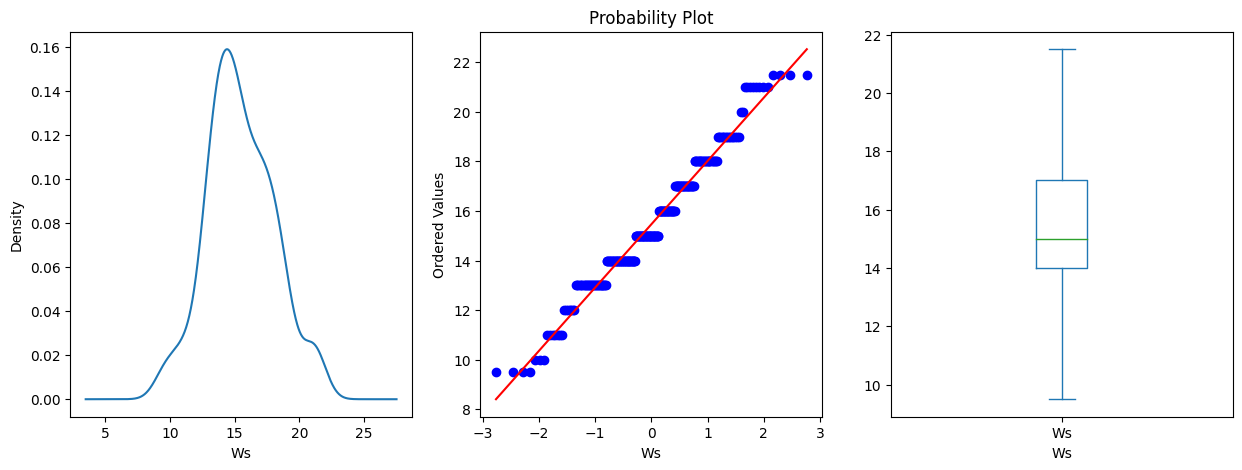

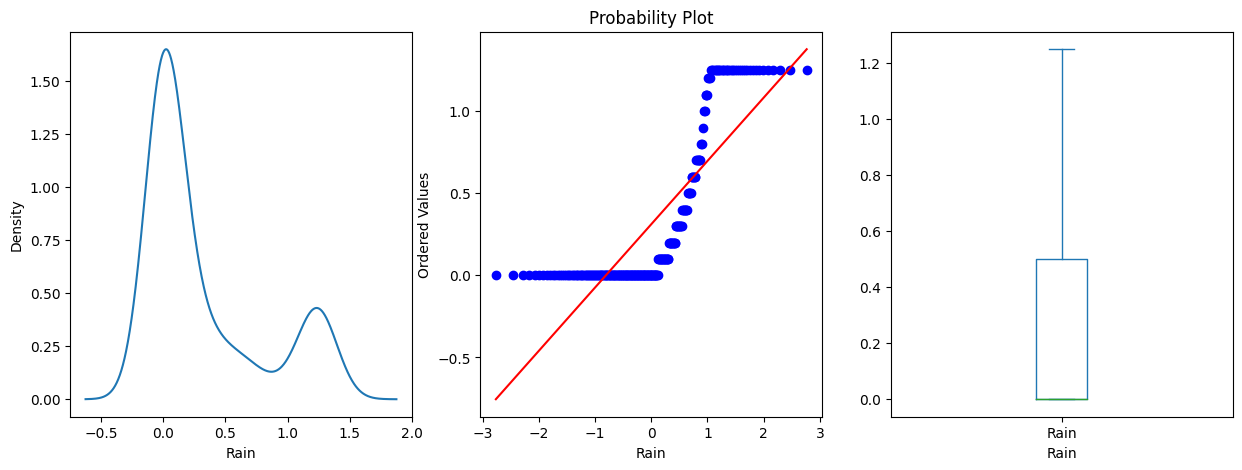

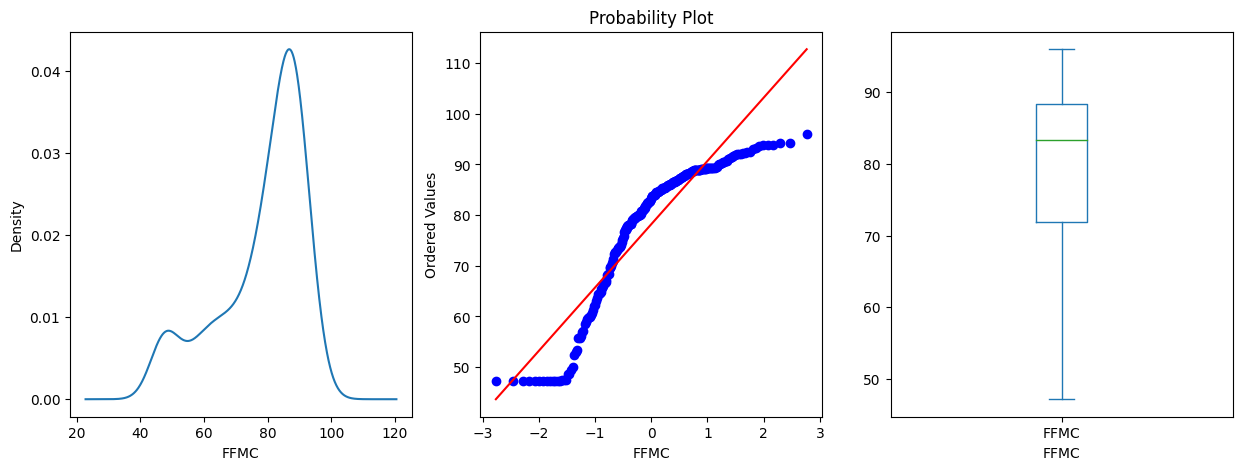

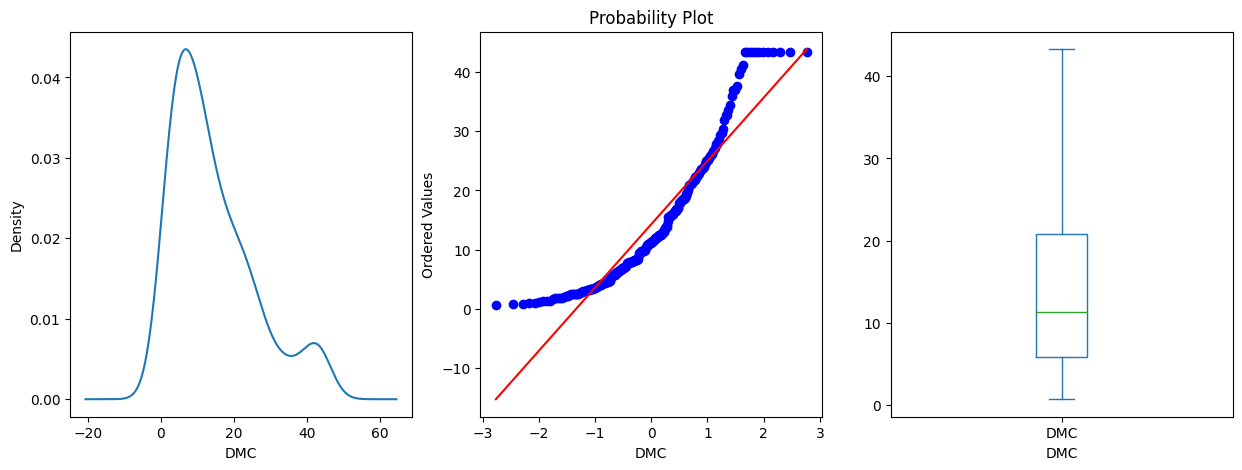

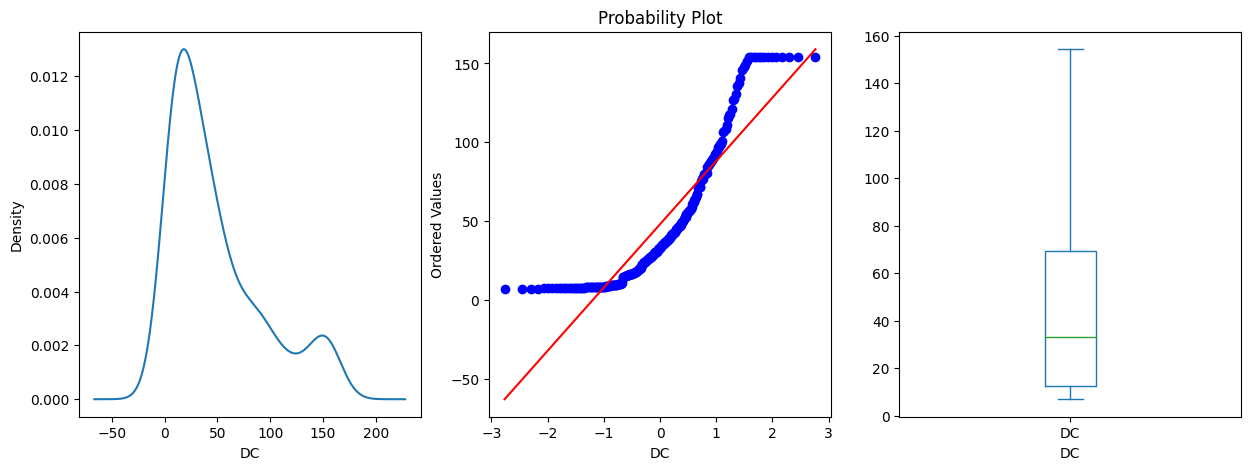

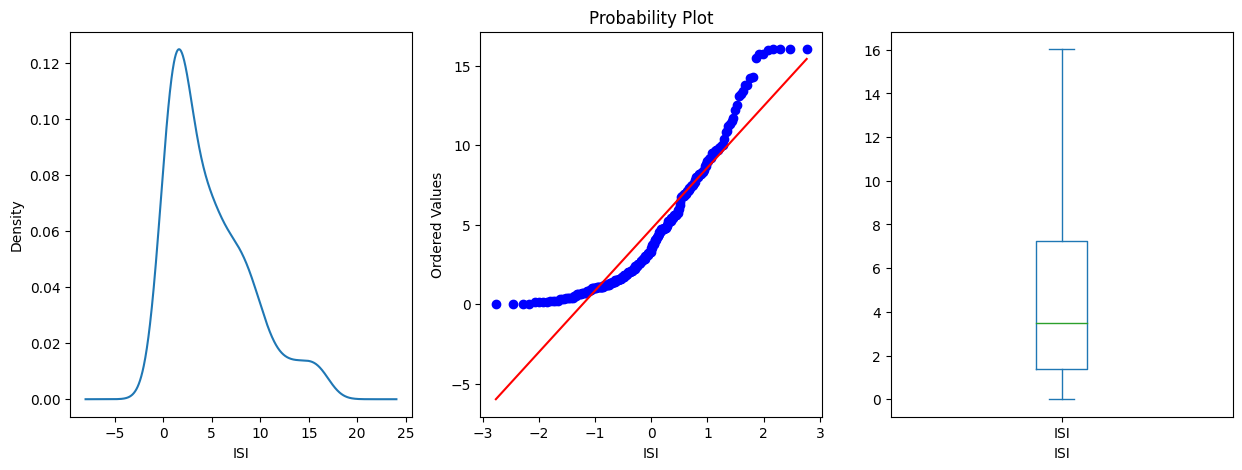

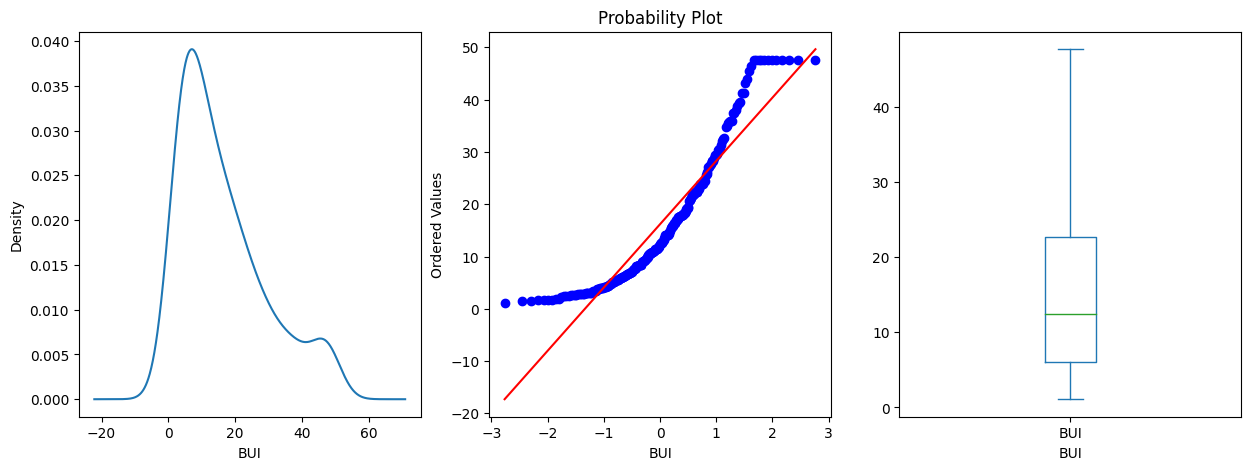

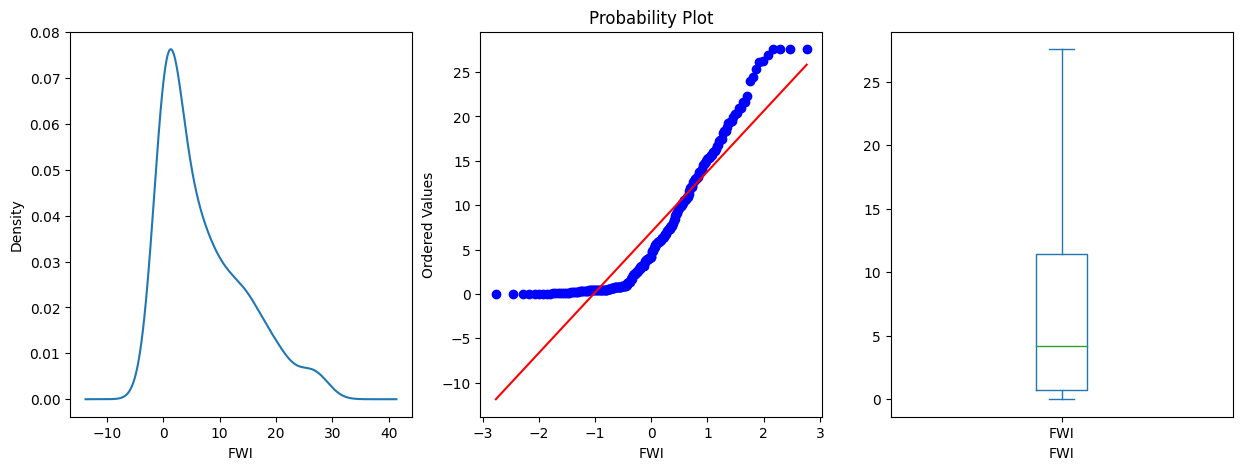

In [36]:
for var in num_col:
  plt.figure(figsize=(15,5))
  plot_graph(data,var)

#### Outliers has been properly replaced

### Standardization

In [37]:
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.156379,62.041152,15.465021,0.311317,78.210185,14.297942,47.981276,4.712757,16.176029,6.988889
std,3.616741,14.828160,2.565226,0.465000,13.372705,11.233125,43.678238,4.064045,12.759347,7.301158
min,22.500000,21.000000,9.500000,0.000000,47.175000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,21.500000,1.250000,96.000000,43.300000,154.225000,16.025000,47.625000,27.575000


In [38]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(data[num_col])
data[num_col]=sc.transform(data[num_col])

In [39]:
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,2.430000e+02,243.000000,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,243.000000
mean,-3.655055e-16,0.000000,-4.386066e-17,-2.924044e-17,1.271959e-15,1.608224e-16,-7.310110e-17,-8.772133e-17,-3.143347e-16,0.000000
std,1.002064e+00,1.002064,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064
min,-2.675422e+00,-2.773497,-2.330139e+00,-6.708809e-01,-2.325576e+00,-1.213020e+00,-9.424846e-01,-1.162016e+00,-1.184006e+00,-0.959206
25%,-5.974520e-01,-0.644776,-5.722866e-01,-6.708809e-01,-4.765911e-01,-7.580688e-01,-8.174510e-01,-8.168204e-01,-7.991813e-01,-0.863133
50%,-4.332667e-02,0.064797,-1.816528e-01,-6.708809e-01,3.813978e-01,-2.674349e-01,-3.414055e-01,-2.990273e-01,-2.965530e-01,-0.382767
75%,7.878614e-01,0.774371,5.996149e-01,4.066079e-01,7.560655e-01,5.800236e-01,4.845047e-01,6.256033e-01,5.084377e-01,0.612275
max,2.727300e+00,1.889415,2.357467e+00,2.022841e+00,1.333054e+00,2.587162e+00,2.437438e+00,2.789239e+00,2.469866e+00,2.825387


### Feature Selection

In [40]:
data.groupby('Region')['Classes'].value_counts()

Region                 Classes 
Bejaia Region          not fire    63
                       fire        59
Sidi-Bel Abbes Region  fire        78
                       not fire    43
Name: Classes, dtype: int64

#### Sidi-Bel Abbes Region has more fires than Bejaia Region

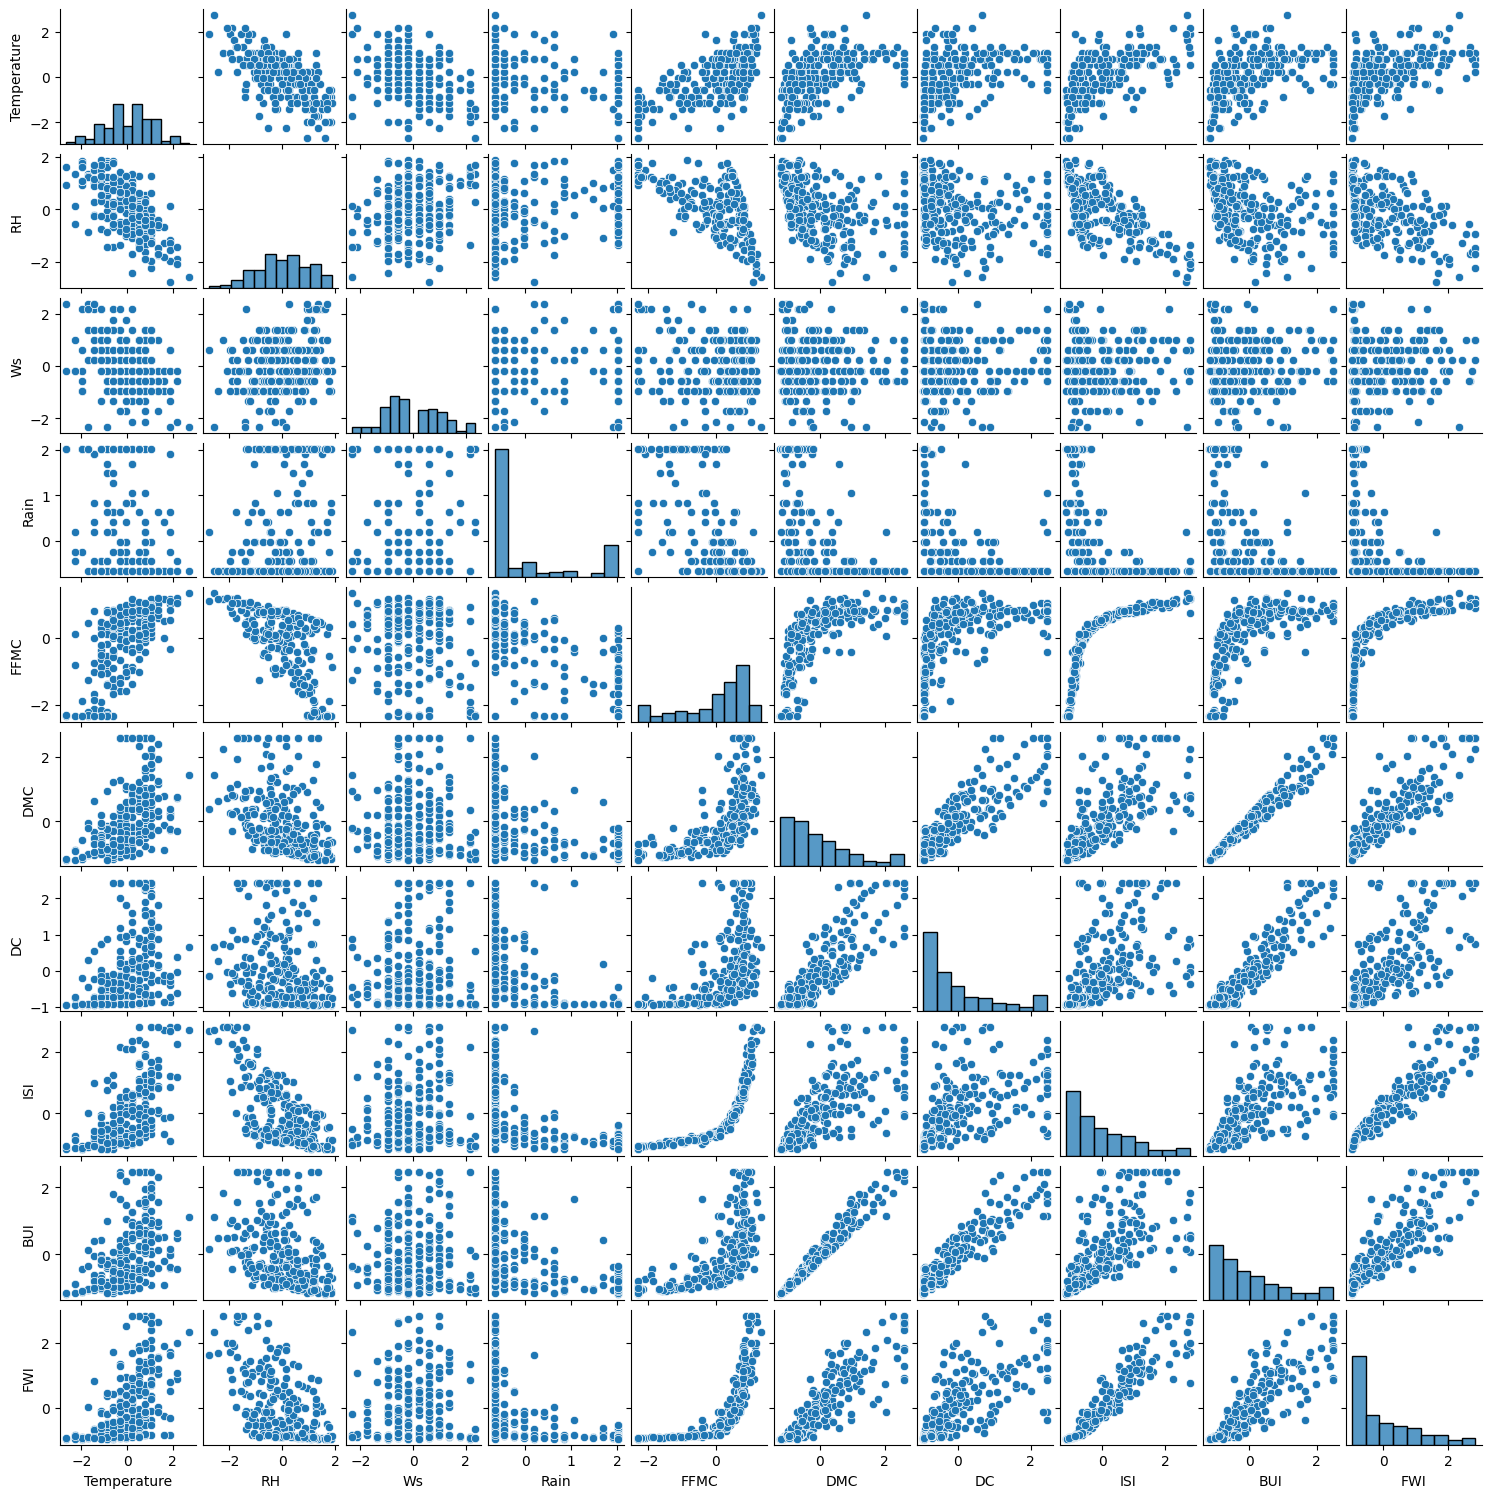

In [80]:
g=sns.pairplot(data[num_col])
g.fig.set_size_inches(15,15)

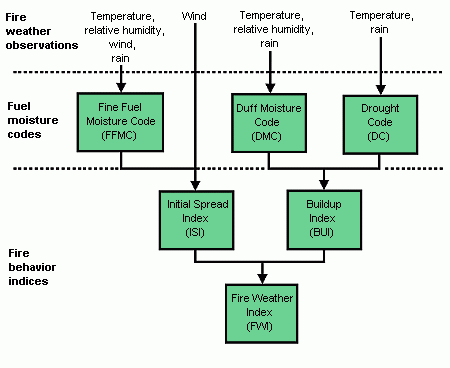

#### Postive correlation is there between FWI---->Temperature,FFMC,DMC,DC,ISI,BUI.
                                    

#### Positive correlation is there between ISI---->Temperature,FFMC,DMC,DC

#### Negative correlation between ISI and RH

<AxesSubplot:title={'center':'Mean ISI & BUI in Sidi-Bel Abbes'}, xlabel='Classes', ylabel='Mean ISI & BUI'>

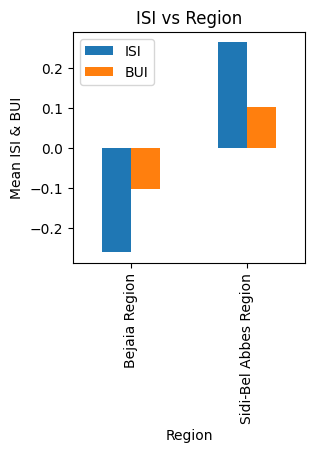

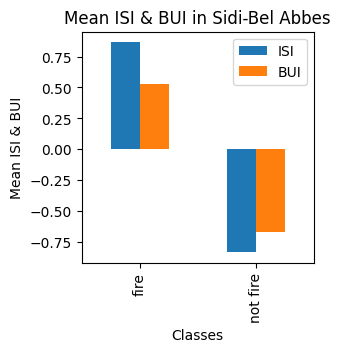

In [114]:
data.groupby('Region')[['ISI','BUI']].mean().plot(kind='bar',title='ISI vs Region',ylabel='Mean ISI & BUI',figsize=(3,3))
data[data['Region']=='Sidi-Bel Abbes Region'].groupby('Classes')[['ISI','BUI']].mean().plot(kind='bar',title='Mean ISI & BUI in Sidi-Bel Abbes',
                                                                                            ylabel='Mean ISI & BUI',figsize=(3,3))

#### From the above plot it is clear that ISI has more overall-impact on forest fires compared to BUI

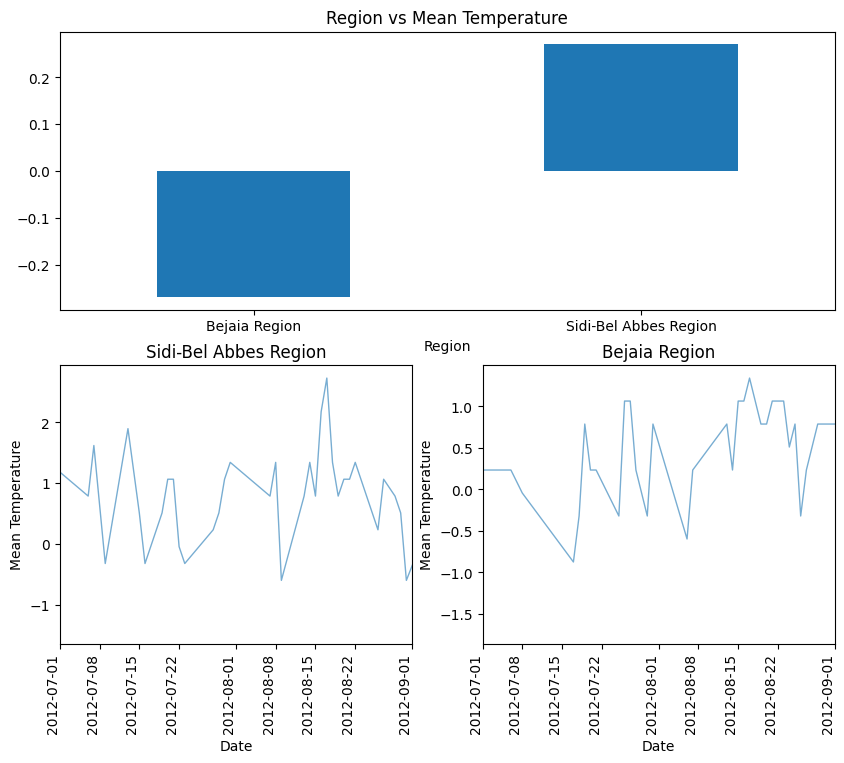

In [71]:
plt.figure(figsize=(10,9))
plt.subplot(211)
data.groupby('Region')['Temperature'].mean().plot(kind='bar',title='Region vs Mean Temperature')
plt.xticks(rotation=0)
plt.subplot(223)
data[(data['Region']=='Sidi-Bel Abbes Region') & (data['Classes']=='fire')].groupby('Date')['Temperature'].mean().plot(xlim=('07-2012','09-2012'),ylabel='Mean Temperature',lw=1,alpha=0.6,title='Sidi-Bel Abbes Region')
plt.xticks(rotation=90)
plt.subplot(224)
data[(data['Region']=='Bejaia Region') & (data['Classes']=='fire')].groupby('Date')['Temperature'].mean().plot(xlim=('07-2012','09-2012'),ylabel='Mean Temperature',lw=1,alpha=0.6,title='Bejaia Region')
plt.xticks(rotation=90)
plt.show()

#### Higher mean temperature leads to more forest fires in Siddi -Bel Abbes. Specially the month of August between 2nd and 4th week, the temperature rises sharply for both the regions. Steps need to be taken to prevent the rise of temperature during this timeline.

In [41]:
pd.pivot_table(data,index=['Region','Classes'],values=num_col,aggfunc=np.mean)

BUI        DC       DMC      FFMC  \
Region                Classes                                            
Bejaia Region         fire      0.569136  0.738606  0.424744  0.627154   
                      not fire -0.729995 -0.564407 -0.774919 -1.014091   
Sidi-Bel Abbes Region fire      0.525278  0.269034  0.630574  0.752895   
                      not fire -0.664210 -0.674531 -0.591274 -0.740470   

                                     FWI       ISI        RH      Rain  \
Region                Classes                                            
Bejaia Region         fire      0.480902  0.377155  0.108323 -0.641661   
                      not fire -0.831108 -0.857915  0.675149  0.601582   
Sidi-Bel Abbes Region fire      0.759948  0.865849 -0.749609 -0.477486   
                      not fire -0.820682 -0.831156  0.221957  0.865167   

                                Temperature        Ws  
Region                Classes                          
Bejaia Region         fire         0.200864  0.069942  
                      not fire    -0.707398  0.305089  
Sidi-Bel Abbes Region fire         0.645778 -0.141588  
                      not fire    -0.410596 -0.286125

#### Some Conclussion for the table

1. Mean temperature ,Wind Speed(Ws) , FFMC,DC,ISI,BUI,FWI is higher in the case of forest fires for both the regions</br>
2. From the previous analysis it was clear that Sidi-Bel Abbes Region has more forest fires.The reasons may be higher mean temperature,</br>
higher Wind speed, Low Relative Humdity,Low Rain compared to Bejaia Region.</br>
3.Higher Wind speed(Ws) and Fine Fuel Moisture Code(FFMC)  leads to higher Initial Spread Index(ISI) which causes forest fires to spread wider across large distances.This can be seen for both the regions.</br>
4. Fire weather Index (FWI) needs to be brought down. It is influenced by ISI and BUI.</br>
5. Sidi-Bel Abbes Region forest fires has significantly higher ISI compared to Bejaia Region.BUI is almost same for both the regions. Therefore it can be said that the main culprit of increased fire in Sidi-Bel Abbes Region is ISI which is further influenced by Temperature,FFMC,DMC,DC,RH.